<a href="https://colab.research.google.com/github/ntyrtype/colabSegmentasi/blob/main/Salinan_dari_modelAI_segmentasiParuparu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup dataset

In [ ]:
!git clone https://github.com/Ekabagus27/dataset-medis_untidar

Cloning into 'dataset-medis_untidar'...
remote: Enumerating objects: 984, done.
remote: Counting objects: 100% (326/326), done.
remote: Compressing objects: 100% (326/326), done.
remote: Total 984 (delta 0), reused 326 (delta 0), pack-reused 658 (from 1)
Receiving objects: 100% (984/984), 220.74 MiB | 16.76 MiB/s, done.


In [ ]:
import os

# Path ke direktori yang berisi file mask
directory = '/content/dataset-medis_untidar/Mask/'

# Mengambil daftar semua file di direktori
for filename in os.listdir(directory):
    # Memeriksa apakah file adalah file gambar dengan ekstensi PNG
    if filename.endswith('.PNG'):
        # Mengambil nomor dari nama file dan mengubah formatnya
        # Contoh: mask_Data (1).PNG menjadi mask_data_1.png
        new_name = filename.replace('mask_Data (', 'mask_data_').replace(').PNG', '.png')

        # Membuat path lengkap untuk file baru
        old_file = os.path.join(directory, filename)
        new_file = os.path.join(directory, new_name)

        # Mengganti nama file
        os.rename(old_file, new_file)

print("Penggantian nama file selesai.")

Penggantian nama file selesai.


In [ ]:
import os

# Path ke direktori X-ray
xray_directory = '/content/dataset-medis_untidar/X-ray/'

# Loop untuk mengubah nama file
for filename in os.listdir(xray_directory):
    if filename.endswith('.png'):
        # Menghapus spasi, tanda kurung, dan mengubah huruf besar menjadi kecil
        new_name = filename.replace(' ', '_').replace('(', '_').replace(')', '').replace('.png', '.png').lower()
        new_name = new_name.replace('data_', 'xray_')  # Menambahkan prefix xray_

        # Mendapatkan path lengkap untuk file lama dan baru
        old_file = os.path.join(xray_directory, filename)
        new_file = os.path.join(xray_directory, new_name)

        # Mengganti nama file
        os.rename(old_file, new_file)
        print(f'Mengganti nama {filename} menjadi {new_name}')

Mengganti nama Data  (305).png menjadi xray___305.png
Mengganti nama Data  (422).png menjadi xray___422.png
Mengganti nama Data  (271).png menjadi xray___271.png
Mengganti nama Data  (351).png menjadi xray___351.png
Mengganti nama Data  (304).png menjadi xray___304.png
Mengganti nama Data  (298).png menjadi xray___298.png
Mengganti nama Data  (63).png menjadi xray___63.png
Mengganti nama Data  (611).png menjadi xray___611.png
Mengganti nama Data  (382).png menjadi xray___382.png
Mengganti nama Data  (445).png menjadi xray___445.png
Mengganti nama Data  (311).png menjadi xray___311.png
Mengganti nama Data  (447).png menjadi xray___447.png
Mengganti nama Data  (417).png menjadi xray___417.png
Mengganti nama Data  (443).png menjadi xray___443.png
Mengganti nama Data  (350).png menjadi xray___350.png
Mengganti nama Data  (416).png menjadi xray___416.png
Mengganti nama Data  (484).png menjadi xray___484.png
Mengganti nama Data  (19).png menjadi xray___19.png
Mengganti nama Data  (212).png m

In [ ]:
pip install numpy opencv-python matplotlib Pillow

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Folder tempat menyimpan gambar dan masker
images_folder = '/content/dataset-medis_untidar/X-ray'
masks_folder = '/content/dataset-medis_untidar/Mask'

# Mengambil daftar file gambar dan masker
image_files = [f for f in os.listdir(images_folder) if f.endswith('.png')]
mask_files = [f for f in os.listdir(masks_folder) if f.endswith('.png')]

# Memastikan bahwa jumlah gambar dan masker sama
if len(image_files) != len(mask_files):
    raise ValueError("Jumlah gambar dan masker tidak sama!")

# Membaca gambar dan masker
images = []
masks = []

# Ukuran target untuk resize
target_size = (256, 256)  # Anda bisa mengganti ukuran ini sesuai kebutuhan

for img_file, mask_file in zip(image_files, mask_files):
    # Membaca gambar dalam mode grayscale
    img = cv2.imread(os.path.join(images_folder, img_file), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    images.append(img)

    # Membaca masker
    mask = cv2.imread(os.path.join(masks_folder, mask_file), cv2.IMREAD_GRAYSCALE)  # Membaca masker sebagai grayscale
    mask = cv2.resize(mask, target_size)  # Resize masker
    masks.append(mask)

# Mengonversi ke numpy array
images = np.array(images)
masks = np.array(masks)

# Normalisasi data
images = images / 255.0
masks = masks[..., np.newaxis] / 255.0  # Tambah dimensi dan normalisasi

# Memastikan bentuk data
print("Images shape:", images.shape)
print("Masks shape:", masks.shape)

# Menambahkan dimensi channel
images = np.expand_dims(images, axis=-1)  # Menambahkan channel ke images
masks = np.expand_dims(masks, axis=-1)    # Menambahkan channel ke masks

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

print("Training Images shape:", X_train.shape)
print("Testing Images shape:", X_test.shape)
print("Training Masks shape:", y_train.shape)
print("Testing Masks shape:", y_test.shape)

Images shape: (331, 256, 256)
Masks shape: (331, 256, 256, 1)
Training Images shape: (264, 256, 256, 1)
Testing Images shape: (67, 256, 256, 1)
Training Masks shape: (264, 256, 256, 1, 1)
Testing Masks shape: (67, 256, 256, 1, 1)


In [ ]:
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = Concatenate()([up6, conv4])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = Concatenate()([up7, conv3])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = Concatenate()([up8, conv2])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = Concatenate()([up9, conv1])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

model = unet_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_134 (Conv2D)       │ (None, 256, 256, 64)   │            640 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_135 (Conv2D)       │ (None, 256, 256, 64)   │         36,928 │ conv2d_134[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_28          │ (None, 128, 128, 64)   │              0 │ conv2d_135[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_136 (Conv2D)       │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_137 (Conv2D)       │ (None, 128, 128, 128)  │        147,584 │ conv2d_136[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_29          │ (None, 64, 64, 128)    │              0 │ conv2d_137[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_138 (Conv2D)       │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_29[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_139 (Conv2D)       │ (None, 64, 64, 256)    │        590,080 │ conv2d_138[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_30          │ (None, 32, 32, 256)    │              0 │ conv2d_139[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_140 (Conv2D)       │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_30[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_141 (Conv2D)       │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_140[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_31          │ (None, 16, 16, 512)    │              0 │ conv2d_141[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_142 (Conv2D)       │ (None, 16, 16, 1024)   │      4,719,616 │ max_pooling2d_31[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_143 (Conv2D)       │ (None, 16, 16, 1024)   │      9,438,208 │ conv2d_142[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_28          │ (None, 32, 32, 1024)   │              0 │ conv2d_143[0][0]       │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_28       

 Total params: 31,377,793 (119.70 MB)

 Trainable params: 31,377,793 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(images, masks, epochs=3, batch_size=32, verbose=1)

Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6120 - loss: 2.8128
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7493 - loss: 0.5837
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7507 - loss: 0.5397


11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step


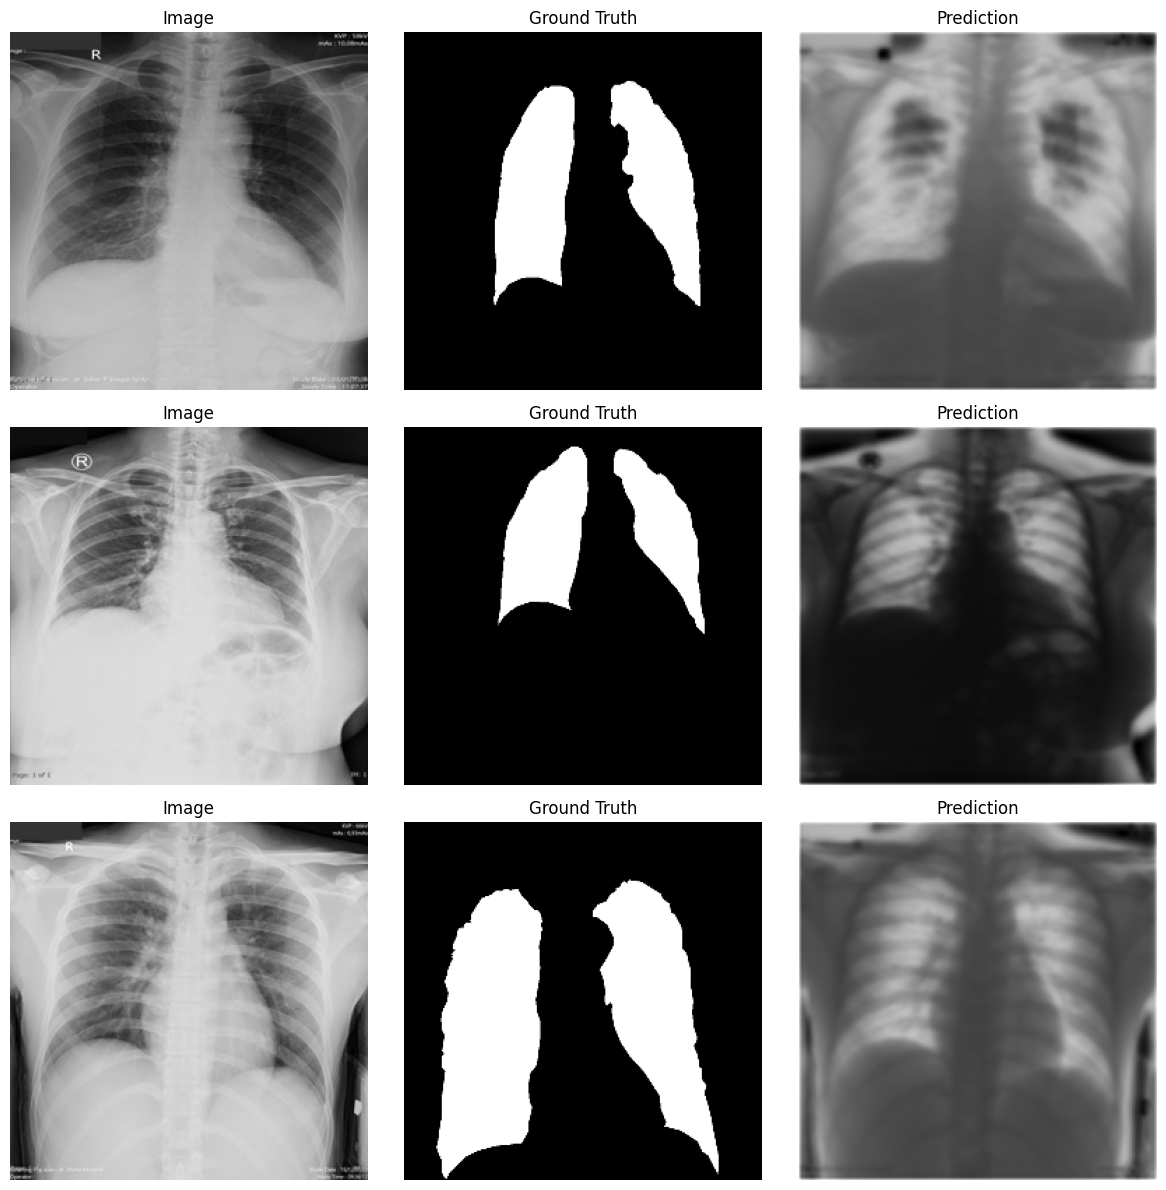

In [ ]:
# Visualisasi hasil prediksi
predictions = model.predict(images)

plt.figure(figsize=(12, 12))
for i in range(3):  # Menampilkan 3 sampel gambar
    # Tampilkan gambar asli
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # Hilangkan squeeze() jika gambar berwarna
    plt.title('Image')
    plt.axis('off')

    # Tampilkan ground truth
    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(masks[i].squeeze(), cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')

    # Tampilkan prediksi
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.title('Prediction')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Inisialisasi ImageDataGenerator dengan augmentasi
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit generator pada data pelatihan
datagen.fit(X_train)

# Callbacks untuk menghentikan pelatihan lebih awal dan menyimpan model terbaik
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('unet_model.keras', save_best_only=True)

# Menggunakan generator saat melatih model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.5754 - loss: 0.7549 - val_accuracy: 0.6702 - val_loss: 0.6925
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.6871 - loss: 0.6249 - val_accuracy: 0.6637 - val_loss: 0.6925
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7157 - loss: 0.5985 - val_accuracy: 0.7226 - val_loss: 0.6843
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 574ms/step - accuracy: 0.7387 - loss: 0.5822 - val_accuracy: 0.7235 - val_loss: 0.6828
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.7478 - loss: 0.5666 - val_accuracy: 0.7278 - val_loss: 0.6758
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 594ms/step - accuracy: 0.7612 - loss: 0.5507 - val_accuracy: 0.7277 - val_loss: 0.6753
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7645 - loss: 0.5466 - val_accuracy: 0.7301 - val_loss: 0.6667
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7691 - loss: 0.5461 - val_accuracy: 0.7300 - val_loss: 0.6661
Ep

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


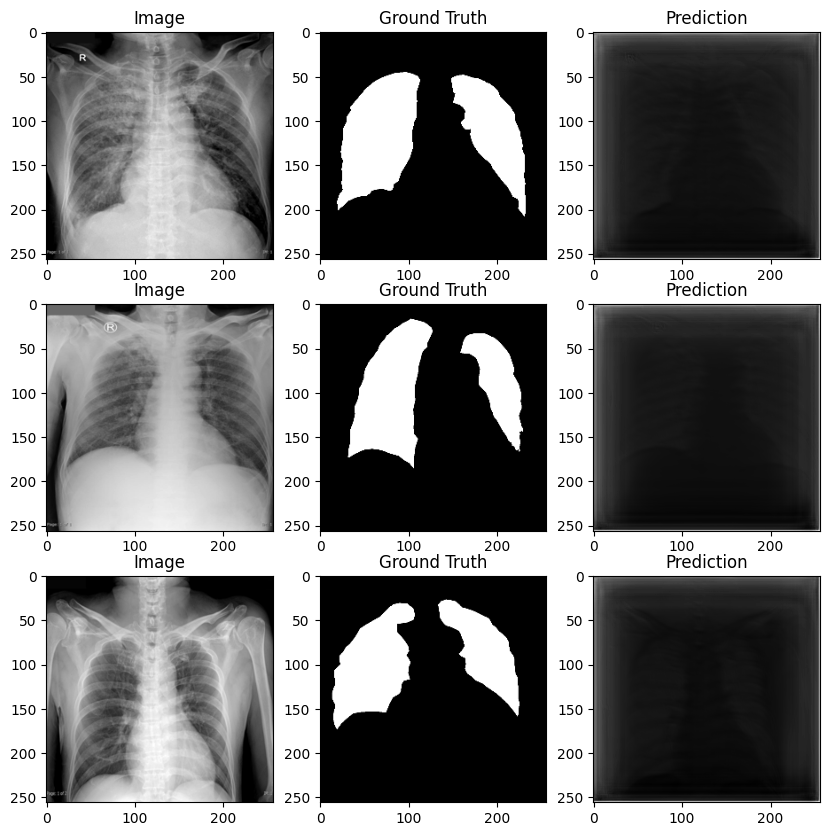

In [ ]:
# Visualisasi hasil prediksi
from keras.models import load_model
model = load_model('/content/unet_model.keras')

predictions = model.predict(X_test)

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(3, 3, i*3 + 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title('Image')

    plt.subplot(3, 3, i*3 + 2)
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.title('Ground Truth')

    plt.subplot(3, 3, i*3 + 3)
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.title('Prediction')

plt.show()

**Punya Anton**

persiapan pustaka

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
import os

Preprocessing data

In [ ]:
dataset_path = '/content/dataset-medis_untidar'

In [ ]:
def load_images_and_masks(image_dir, mask_dir, img_size=(256, 256)):
    images = []
    masks = []

    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_filename, mask_filename in zip(image_filenames, mask_filenames):
        img = cv2.imread(os.path.join(image_dir, img_filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        images.append(img)

        mask = cv2.imread(os.path.join(mask_dir, mask_filename), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, img_size)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Muat data
image_dir = '/content/dataset-medis_untidar/Mask'
mask_dir = '/content/dataset-medis_untidar/X-ray'

images, masks = load_images_and_masks(image_dir, mask_dir)

In [ ]:
def count_files_in_directory(directory):
    return len(os.listdir(directory))

num_images = count_files_in_directory(image_dir)
num_masks = count_files_in_directory(mask_dir)

print(f"Jumlah gambar di {image_dir}: {num_images}")
print(f"Jumlah mask di {mask_dir}: {num_masks}")

Jumlah gambar di /content/dataset-medis_untidar/Mask: 331
Jumlah mask di /content/dataset-medis_untidar/X-ray: 331


**Unet model**

In [ ]:
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = Concatenate()([up6, conv4])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = Concatenate()([up7, conv3])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = Concatenate()([up8, conv2])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = Concatenate()([up9, conv1])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

model = unet_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 512)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 16, 16, 1024)   │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 16, 16, 1024)   │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 32, 32, 1024)   │              0 │ conv2d_9[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32, 32, 1536)   │              0 │ up_sampling2d[0][0],   │
│                      

 Total params: 31,377,793 (119.70 MB)

 Trainable params: 31,377,793 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(images, masks, epochs=3, batch_size=32, verbose=1)


Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 216s 8s/step - accuracy: 0.0036 - loss: -1622.1589
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.0011 - loss: -2128.8977
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.0011 - loss: -2128.3425


In [ ]:
# Visualisasi hasil prediksi
predictions = model.predict(images)

plt.figure(figsize=(12, 12))
for i in range(3):  # Menampilkan 3 sampel gambar
    # Tampilkan gambar asli
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # Hilangkan squeeze() jika gambar berwarna
    plt.title('Image')
    plt.axis('off')

    # Tampilkan ground truth
    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(masks[i].squeeze(), cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')

    # Tampilkan prediksi
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.title('Prediction')
    plt.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'model' is not defined

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (9).

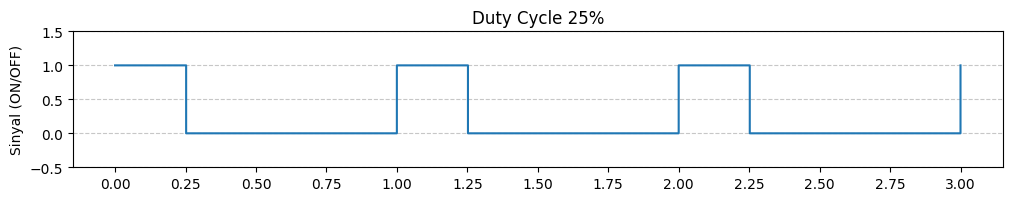

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Konfigurasi data
T = 1  # Satu periode
time = np.linspace(0, 3 * T, 1000)  # 3 periode untuk visualisasi

# Membuat sinyal PWM untuk duty cycle 25%, 50%, 75%
duty_25 = ((time % T) < (T / 4)).astype(int)
duty_50 = ((time % T) < (T / 2)).astype(int)
duty_75 = ((time % T) < (3 * T / 4)).astype(int)

# Plot
plt.figure(figsize=(12, 6))

# Duty cycle 25%
plt.subplot(3, 1, 1)
plt.step(time, duty_25, where='post', label="Duty Cycle 25%")
plt.title("Duty Cycle 25%")
plt.ylim(-0.5, 1.5)
plt.ylabel("Sinyal (ON/OFF)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 3 * T + T / 4, T / 4), labels=["0", "T/4", "T/2", "3T/4", "T", "5T/4", "3T/2", "7T/4", "2T"])

# Duty cycle 50%
plt.subplot(3, 1, 2)
plt.step(time, duty_50, where='post', label="Duty Cycle 50%")
plt.title("Duty Cycle 50%")
plt.ylim(-0.5, 1.5)
plt.ylabel("Sinyal (ON/OFF)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 3 * T + T / 2, T / 2), labels=["0", "T/2", "T", "3T/2", "2T"])

# Duty cycle 75%
plt.subplot(3, 1, 3)
plt.step(time, duty_75, where='post', label="Duty Cycle 75%")
plt.title("Duty Cycle 75%")
plt.ylim(-0.5, 1.5)
plt.ylabel("Sinyal (ON/OFF)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 3 * T + T / 4, T / 4), labels=["0", "T/4", "T/2", "3T/4", "T", "5T/4", "3T/2", "7T/4", "2T"])
plt.xlabel("Waktu")

# Layout dan tampilkan
plt.tight_layout()
plt.show()